# Understanding India's High-Skilled Labour Market

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=15)
matplotlib.rc('axes', titlesize=15)
matplotlib.rc('axes', labelsize=15)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('legend', fontsize=15)
matplotlib.rc('figure', titlesize=15)
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_excel('train.xlsx')
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
data.Designation.unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

### Ten highest paying positions

In [3]:
salary_by_designation = data[['Designation','Salary']].groupby('Designation',as_index=False).mean().sort('Salary',ascending=False).head(10)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


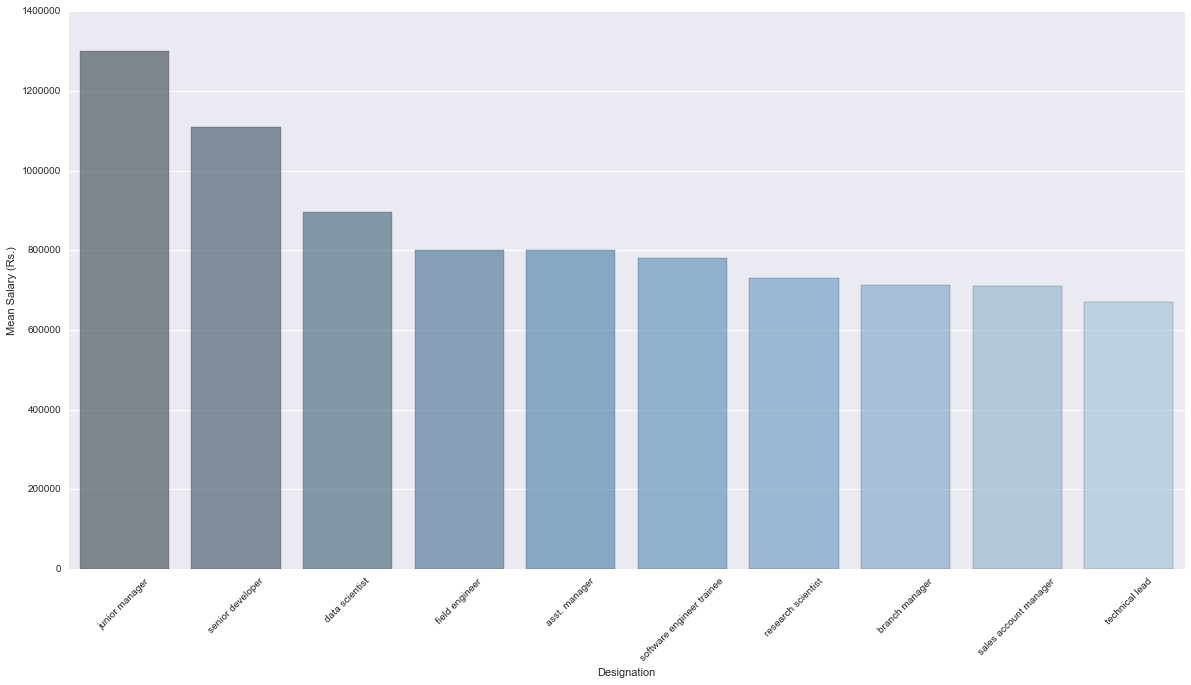

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary', data=salary_by_designation, alpha=0.6, palette='Blues_d')
plt.xticks(rotation=45)
plt.ylabel("Mean Salary (Rs.)")
plt.show()

## Cities with maximum jobs

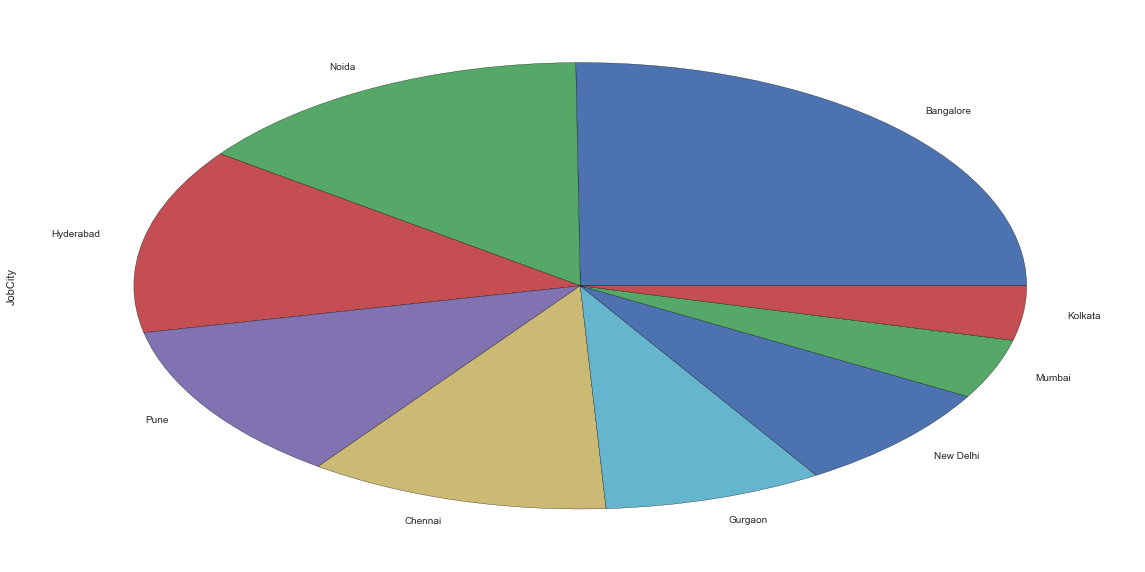

In [5]:
plt.figure(figsize=(20,10))
job_cities = data['JobCity'].value_counts().head(10)
job_cities = job_cities.drop([-1]) #drop invalid index -1
job_cities.plot(kind='pie')

## Most popular technical courses

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

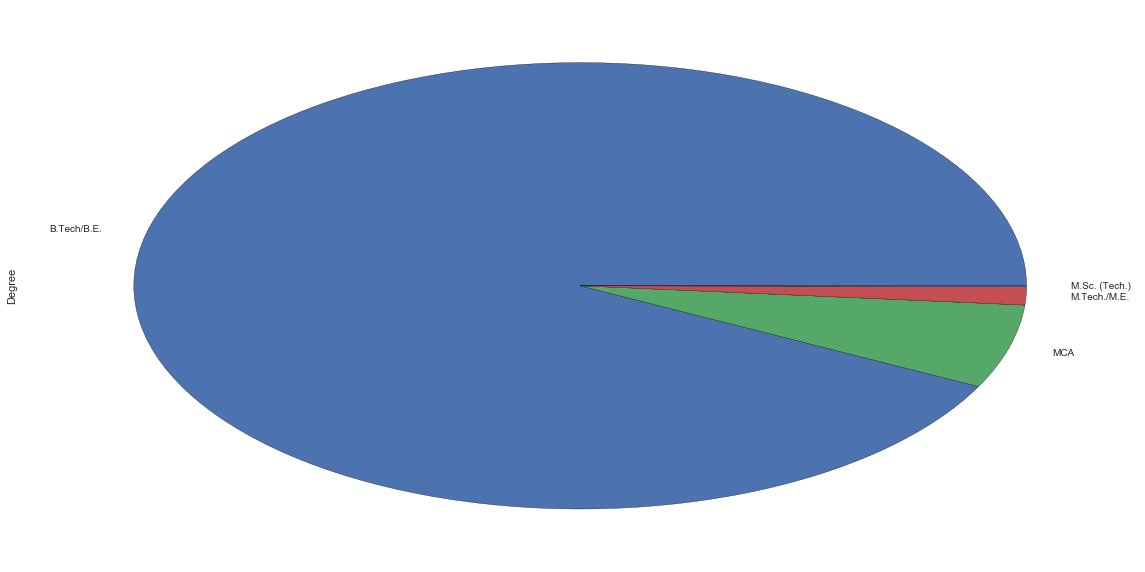

In [6]:
plt.figure(figsize=(20,10))
courses = data['Degree'].value_counts()
courses.plot(kind='pie')
plt.xticks(rotation=45)

#### Perception: There is a linear relation between GPA & Salary. 
#### Is there?

Normalize Salary

In [7]:
mean_salary = data.Salary.dropna().mean() 
max_salary = data.Salary.dropna().max()
min_salary = data.Salary.dropna().min()
salary_data = data['Salary'].apply(lambda x: (x - mean_salary ) / (max_salary -min_salary ))

Normalize GPA

In [8]:
mean_gpa = data.collegeGPA.dropna().mean() 
max_gpa = data.collegeGPA.dropna().max()
min_gpa = data.collegeGPA.dropna().min()
data['collegeGPA'] = data['collegeGPA'].apply(lambda x: (x - mean_gpa ) / (max_gpa -min_gpa ))

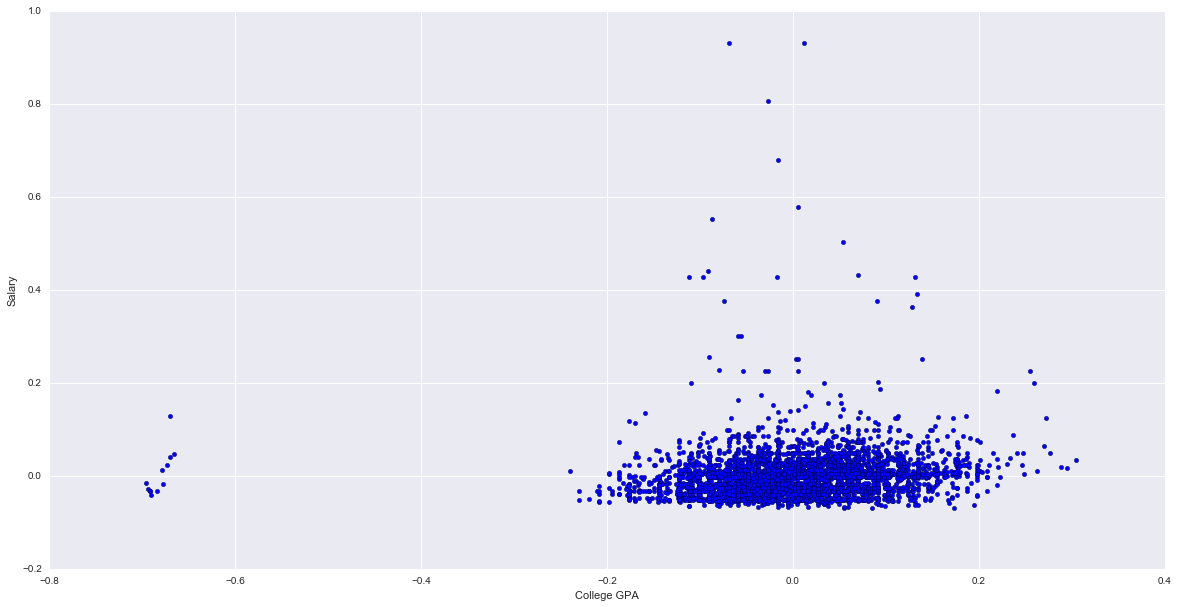

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(data['collegeGPA'],salary_data)
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

*We have still not taken into account year of graduation,work experience, degree,college, age etc, but for now, as it may seem, that there is NO correlation between College GPA & the salary offered.*

## Most common professions

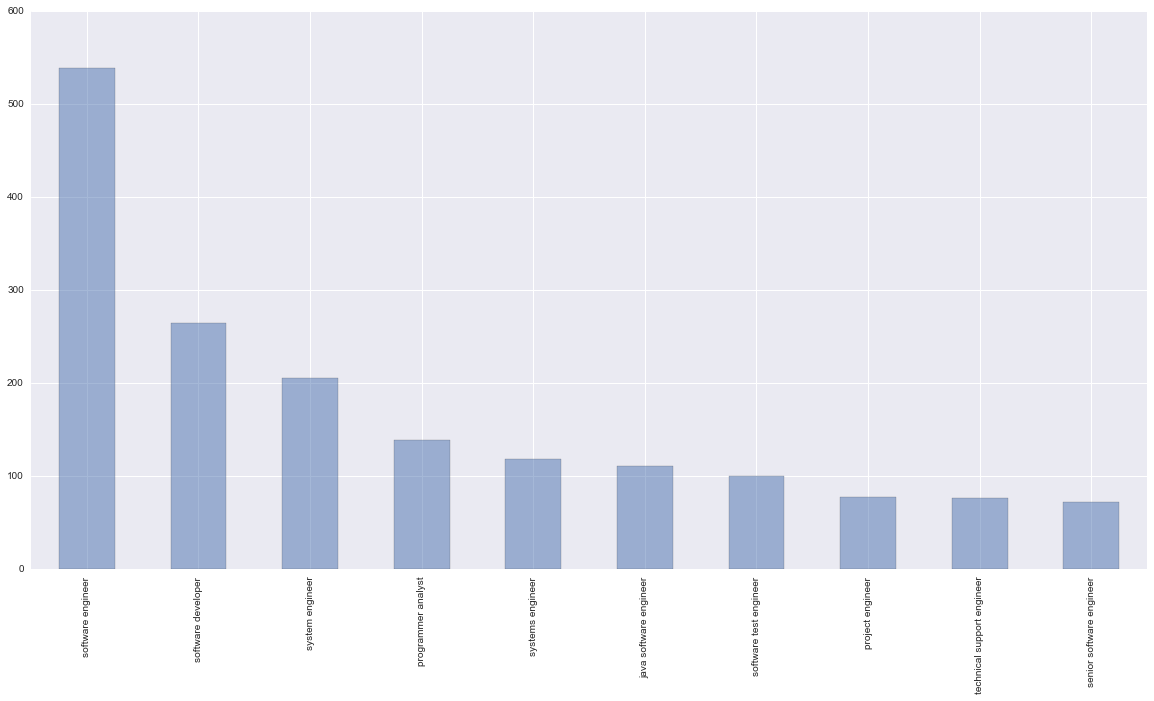

In [10]:
plt.figure(figsize=(20,10))
profession = data['Designation'].value_counts().head(10)
profession.plot(kind='bar',alpha=0.5)

## Calculating Underemployment

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


IQR =  145000.0
Upper threshhold : 617500.0
Lower threshhold : 37500.0
Mean Salary    324413.461538
dtype: float64
Total underemployment amoung Software Engineers :  50.09276437847866 %


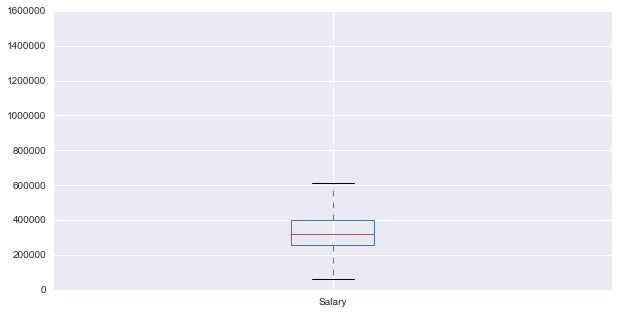

In [11]:
plt.figure(figsize=(10,5))
salary = data.loc[:,['Salary','Designation']]
salary = salary.ix[salary['Designation']=='software engineer']
salary.boxplot()
Q1 = salary['Salary'].quantile(0.25)
Q3 = salary['Salary'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR = ",(IQR))
threshold_upper = Q3 + 1.5*IQR 
threshold_lower = Q1- 1.5*IQR
print("Upper threshhold :",threshold_upper)
print("Lower threshhold :",threshold_lower)
salary_new = salary.loc[(salary['Salary'] < threshold_upper) & (salary['Salary'] > threshold_lower)]
print("Mean",salary_new.mean())
under_employed = salary_new[salary_new['Salary'] < int(salary_new.mean())].shape[0]
percentage = (under_employed/salary.shape[0])*100
print("Total underemployment amoung Software Engineers : ", percentage,'%')

*Nearly 51% of all Software Engineers are UNDEREMPLOYED*

Some more analytics soon to follow: Salary vs all_remaining_stats, Salary Distribution (Histogram), pie chart for kinds of jobs amoung Computer Engineers, Spatial Viz (Difficult- Map of India). 

ML- We can go ahead with PCA due to large number of features. Then test accuracy against different regressors.

Estimated Time to do the above: 2 Days

## Distribution of salaries
Probability distribution of salaries (indian context)

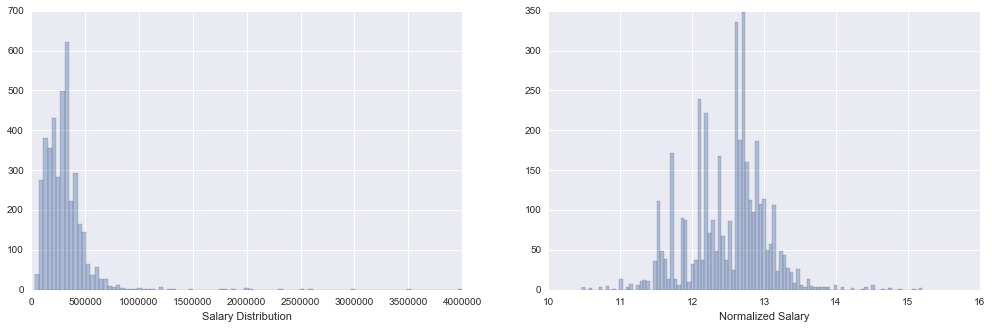

In [12]:
figure, (ax1, ax2) = plt.subplots(1,2,figsize = (17,5))
sns.distplot(data['Salary'], axlabel='Salary Distribution',kde=False, ax = ax1, bins = 100)
transformed_salary = np.log1p(data['Salary'])
sns.distplot(transformed_salary, axlabel = 'Normalized Salary',kde=False, ax = ax2, bins = 100)

Most of the salary is accumulated around 3 to 5 LPA region, which is the average salary obtained by Indian (engineering) candidates. Few outliers are present above 10 LPA.

## College Tier and College City Tier
College Tier : The dataset contained a field of College Tier where AMCAT annotated each college with a score of 1 and 2. The annotations have been computed from the average scores obtained by the students in the college/university as well as the institute's reputation. Colleges with an average score above a threshold as tagged as 1 and others as 2.

In our observation, Tier 1 college candidates have secured more salary in average than Tier 2 college, which coincides with the general trend.

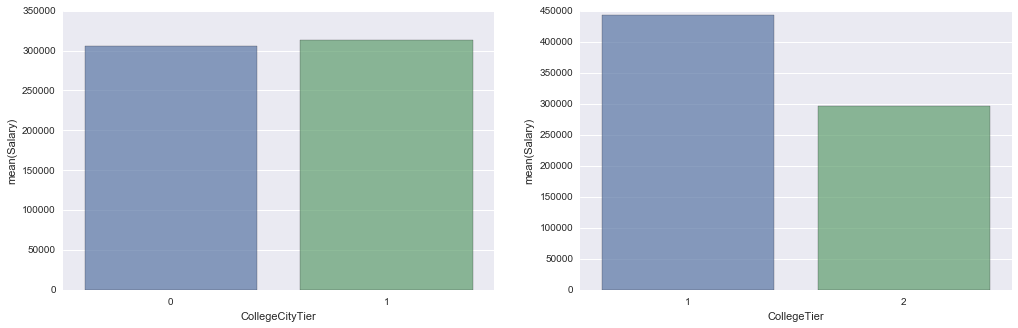

In [22]:
college_city_tier = data[['CollegeCityTier','Salary']].groupby('CollegeCityTier', as_index=False).mean()
college_tier = data[['CollegeTier','Salary']].groupby('CollegeTier', as_index=False).mean()
figure, (ax1, ax2) = plt.subplots(1,2,figsize = (17,5))
sns.barplot(x='CollegeCityTier', y='Salary',data=college_city_tier,ax=ax1,alpha=0.7)
sns.barplot(x='CollegeTier', y='Salary',data=college_tier,ax=ax2,alpha=0.7)

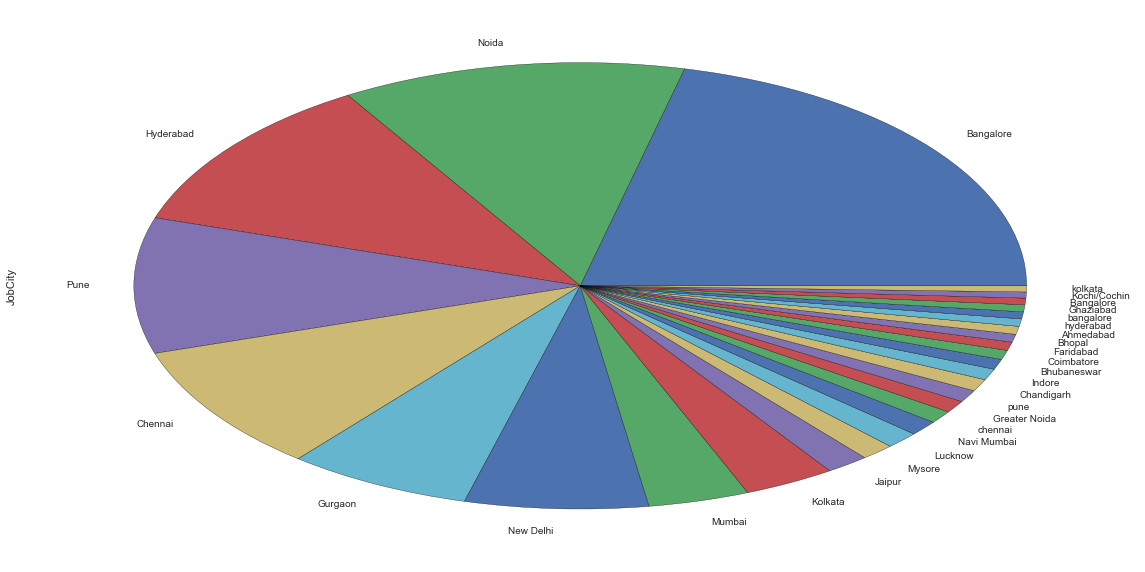

In [24]:
plt.figure(figsize=(20,10))
job_cities = data['JobCity'].value_counts().head(30)
job_cities = job_cities.drop([-1]) #drop invalid index -1
job_cities.plot(kind='pie')

In [26]:
data['JobCity'] = data.JobCity.str.lower()
data['JobCity'] = data.JobCity.str.lstrip()
data['JobCity'] = data.JobCity.str.rstrip()

In [27]:
data.JobCity = data.JobCity.str.replace('banglore','bangalore')
data.JobCity = data.JobCity.str.replace('delhi','new delhi')
data.JobCity = data.JobCity.str.replace('new dehli','new delhi')
data.JobCity = data.JobCity.str.replace('new delhi/ncr','new delhi')
data.JobCity = data.JobCity.str.replace('ncr','new delhi')
data.JobCity = data.JobCity.str.replace('navi mumbai','mumbai')
data.JobCity = data.JobCity.str.replace('mumbai , hyderabad','mumbai')
data.JobCity = data.JobCity.str.replace('new new delhi','new delhi')
data.JobCity = data.JobCity.str.replace('asifabadbangalore','bangalore')
data.JobCity = data.JobCity.str.replace('bengaluru','bangalore')
data.JobCity = data.JobCity.str.replace('greater noida','noida')
data.JobCity = data.JobCity.str.replace('nouda','noida')
data.JobCity = data.JobCity.str.replace('banagalore','bangalore')
data.JobCity = data.JobCity.str.replace('banaglore','bangalore')
data.JobCity = data.JobCity.str.replace('a-64,sec-64,noida','noida')
data.JobCity = data.JobCity.str.replace('technopark, trivandrum','trivandrum')
data.JobCity = data.JobCity.str.replace('vizag','visakhapatnam')
data.JobCity = data.JobCity.str.replace('vsakhapttnam','visakhapatnam')
data.JobCity = data.JobCity.str.replace('thiruvananthapuram','trivandrum')
data.JobCity = data.JobCity.str.replace('ambala city','ambala')
data.JobCity = data.JobCity.str.replace('kudankulam ,tarapur','kundankulam')
data.JobCity = data.JobCity.str.replace('gaziabaad','ghaziabad')
data.JobCity = data.JobCity.str.replace('gajiabaad','ghaziabad')
data.JobCity = data.JobCity.str.replace('bhubaneswar','bhubaneshwar')
data.JobCity = data.JobCity.str.replace('bhubneshwar','bhubaneshwar')
data.JobCity = data.JobCity.str.replace('guragaon','gurgaon')
data.JobCity = data.JobCity.str.replace('gurgoan','gurgaon')
data.JobCity = data.JobCity.str.replace('kolkata`','kolkata')
data.JobCity = data.JobCity.str.replace('sonepat','sonipat')
data.JobCity = data.JobCity.str.replace('baroda','vadodara')
data.JobCity = data.JobCity.str.replace('hderabad','hyderabad')
data.JobCity = data.JobCity.str.replace('pondi','pondy')
data.JobCity = data.JobCity.str.replace('punchkula','panchkula')
data.JobCity = data.JobCity.str.replace('muzzafarpur','muzaffarpur')
data.JobCity = data.JobCity.str.replace('kochi/cochin, chennai and coimbatore','kochi/cochin')
data.JobCity = data.JobCity.str.replace('nasikcity','nashik')
data.JobCity = data.JobCity.str.replace('sahibabad','shahibabad')
data.JobCity = data.JobCity.str.replace('punr','pune')
data.JobCity = data.JobCity.str.replace('tirupati','tirupathi')
data.JobCity = data.JobCity.str.replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')

In [28]:
data['JobCity'].value_counts()

bangalore                 687
noida                     420
hyderabad                 369
pune                      328
chennai                   313
new delhi                 228
gurgaon                   222
mumbai                    154
kolkata                   120
jaipur                     53
lucknow                    41
bhubaneshwar               40
mysore                     40
chandigarh                 28
indore                     25
coimbatore                 21
ahmedabad                  19
bhopal                     19
trivandrum                 18
ghaziabad                  18
faridabad                  18
kochi/cochin               14
mohali                     13
nagpur                     11
dehradun                   11
mangalore                  11
visakhapatnam              11
kanpur                      9
jabalpur                    7
thane                       7
                         ... 
bundi                       1
jhajjar                     1
london    

#### Querying Google API to generate lat-long coordinates

In [29]:
import urllib
import simplejson
from IPython.display import clear_output
import time

googleGeocodeUrl = 'http://maps.googleapis.com/maps/api/geocode/json?'

def get_coordinates(query, from_sensor=False):
    latitude, longitude = None, None
    if isinstance(query,str):
        query = query.encode('utf-8')
        params = {
            'address': query,
            'sensor': "true" if from_sensor else "false"
        }
        url = googleGeocodeUrl + urllib.parse.urlencode(params)
        json_response = urllib.request.urlopen(url)
        response = simplejson.loads(json_response.read())
        if response['results']:
            location = response['results'][0]['geometry']['location']
            latitude, longitude = round(location['lat'],3), round(location['lng'],3)
            print (query, latitude, longitude)
        else:
            print (query, "<no results>")
    time.sleep(1)
    clear_output()
    return [latitude, longitude]

In [34]:
city_geo = pd.DataFrame({'count': data.groupby('JobCity', as_index=False).size()}).reset_index()
city_geo.head()

,JobCity,count
0,agra,2
1,ahmedabad,19
2,ahmednagar,2
3,"al jubail,saudi arabia",1
4,allahabad,1


In [36]:
city_geo['Coordinates'] = 0
city_geo['Coordinates'] = city_geo['JobCity'].apply(lambda x: get_coordinates(x))

In [37]:
city_geo['city_lat'] = city_geo.Coordinates.apply(lambda x : x[0])
city_geo['city_lon'] = city_geo.Coordinates.apply(lambda x : x[1])


,JobCity,count,Coordinates,city_lat,city_lon
0,agra,2,"[27.177, 78.008]",27.177,78.008
1,ahmedabad,19,"[23.023, 72.571]",23.023,72.571
2,ahmednagar,2,"[19.095, 74.75]",19.095,74.750
3,"al jubail,saudi arabia",1,"[26.96, 49.569]",26.960,49.569
4,allahabad,1,"[25.436, 81.846]",25.436,81.846
5,alwar,1,"[27.553, 76.635]",27.553,76.635
6,am,1,"[40.069, 45.038]",40.069,45.038
7,ambala,3,"[30.378, 76.777]",30.378,76.777
8,angul,1,"[20.844, 85.151]",20.844,85.151
9,ariyalur,1,"[11.14, 79.079]",11.140,79.079


In [38]:
city_geo.to_csv("ikdd_city_geo.csv", index=False)

In [39]:
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
from numpy import array

In [46]:
def plot_map(sizes, colorVal):
    f, ax = plt.subplots(figsize=(12,9))
    map = Basemap(width=5000000,
                  height=3500000,
                  resolution='l',
                  projection='aea',
                  llcrnrlon=69,
                  llcrnrlat=6,
                  urcrnrlon=99,
                  urcrnrlat=36,
                  lon_0=78,
                  lat_0=20,
                  ax=ax)
    map.drawmapboundary(fill_color='cyan')
    map.fillcontinents(color='#faebd7', lake_color='cyan', zorder=0.5)
    map.drawcountries(color='black')
    x, y = map(array(city_geo["city_lon"]), array(city_geo["city_lat"]))
    cs = map.scatter(x, y, s=sizes, marker="o", c=sizes, cmap=cm.Dark2, alpha=0.5)
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorVal)
    plt.figure(figsize=(30,30))
    plt.show()

## Private Sector Tech Job by Demographics

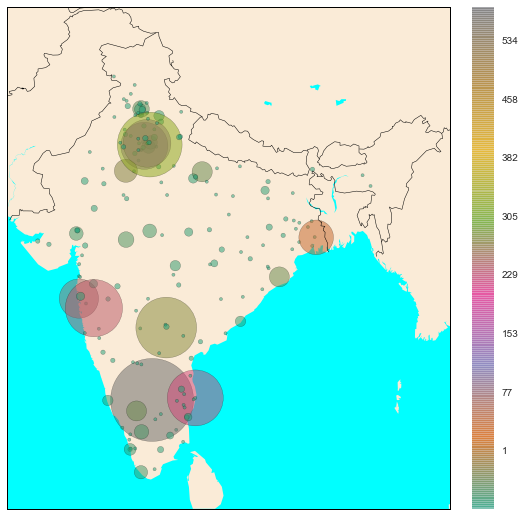

In [47]:
jobs_by_city = city_geo['count'].apply(lambda x: int(x*10))
colorVal = np.linspace(city_geo["count"].min(), city_geo["count"].max(), 
                            num=10)
colorVal = colorVal.astype(int)

plot_map(jobs_by_city, colorVal)

# Pipeline for Testing & Training Process (ML)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, LassoLarsCV, ElasticNet, Lasso

In [50]:
data = pd.read_excel('train.xlsx')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, train to train
Data columns (total 38 columns):
ID                       3998 non-null int64
Salary                   3998 non-null int64
DOJ                      3998 non-null datetime64[ns]
DOL                      3998 non-null object
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null int64
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityID            3998 non-null int64
Colleg

### Methodology

Target Predictor: Salary/Employment of a potential candidate- float64 (=> Regression Problem)

Linear Models under consideration: Ridge, Lasso, Linear, SVM
Decision Trees: Random Forest
Others (optional- if time permits): Gradient Boosting (XGB- Might do better than NN)
Primary/Benchmark Model: Neural Network (Multilayer Perceptron Topology)

Steps:
1. Preprocess data (Convert to appropriate (numerical) data types)
2. Determine skewness of all numerical features under consideration- transform if necessary.
3. Train*/Test Models (75-25 split for training & testing)

*May use Hyperparameters (Gridsearch) and/or K-Fold CV while training for increased accuracy. 